x: mean=100.776 stdv=19.620
y: mean=151.050 stdv=22.358


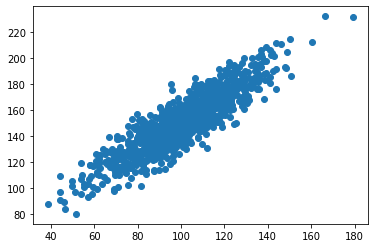

In [2]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50)
# summarize
print('x: mean=%.3f stdv=%.3f' % (mean(x), std(x)))
print('y: mean=%.3f stdv=%.3f' % (mean(y), std(y)))
# plot
pyplot.scatter(x, y)
pyplot.show()


b0=1.011, b1=49.117


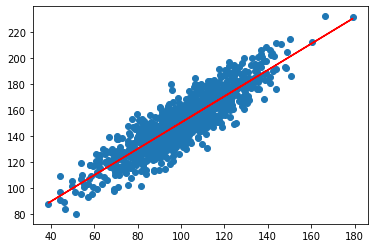

In [3]:
# simple linear regression model
from numpy.random import randn
from numpy.random import seed
from scipy.stats import linregress
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50)
# fit linear regression model
b1, b0, r_value, p_value, std_err = linregress(x, y)
print('b0=%.3f, b1=%.3f' % (b1, b0))
# make prediction
yhat = b0 + b1 * x
# plot data and predictions
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color='r')
pyplot.show()


 Siguen nuestros errores una distribución normal?

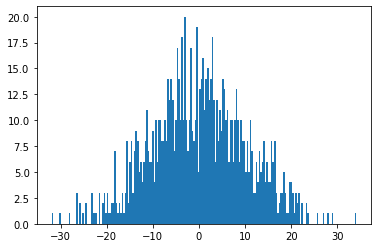

In [4]:
yhat = b0 + b1 * x
errs = (y - yhat)
pyplot.hist(errs, bins=200)
pyplot.show()


In [5]:
from numpy import sum as arraysum
from numpy import sqrt
# define new input, expected value and prediction
x_in = x[0]
y_out = y[0]
yhat_out = yhat[0]
# estimate stdev of yhat

# Ver la diferencia entre el cálculo de esta std donde se toman las diferencias (errores) reales respecto de los valor reales de y: https://machinelearningmastery.com/prediction-intervals-for-machine-learning/
# VS el cálculo típico de la std en una distribución, que es respecto del valor medio de los valres: https://en.wikipedia.org/wiki/Standard_deviation
# “revisar prediction intervals section en mi carpeta libro 'Practical statistics for data scientists'”

Prediction Interval: 20.204
95% likelihood that the true value is between 160.750 and 201.159
True value: 183.124


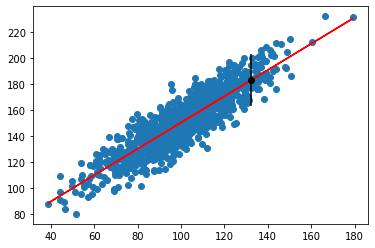

In [6]:
sum_errs = arraysum((y - yhat)**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)
# We will use the significance level of 95%, which is 1.96 standard deviations.
# Once the interval is calculated, we can summarize the bounds on the prediction to the user.
# calculate prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = y_out - interval, y_out + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
print('True value: %.3f' % yhat_out)
# plot dataset and prediction with interval
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color='red')
pyplot.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
pyplot.show()
